<h1 style = "font-size:3rem;color:orange">Additive Synthesis</h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd     # for playing audio

Creating sinusoid

In [2]:
Fs = 44100                    # sampling frequency
dur = 2                       # duration
num_samples = Fs * dur
f0 = 220                      # fundamental freq 

t  = np.linspace(0,dur,num_samples)
x = np.sin(2 * np.pi * f0 * t)

Visualize data

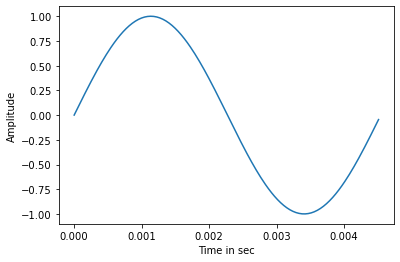

In [3]:
plt.xlabel("Time in sec")
plt.ylabel("Amplitude")
plt.plot(t[0:200] , x[0:200])


Play audio file

In [4]:
ipd.Audio(data = x, rate = Fs)

Adding up sinusoidal components

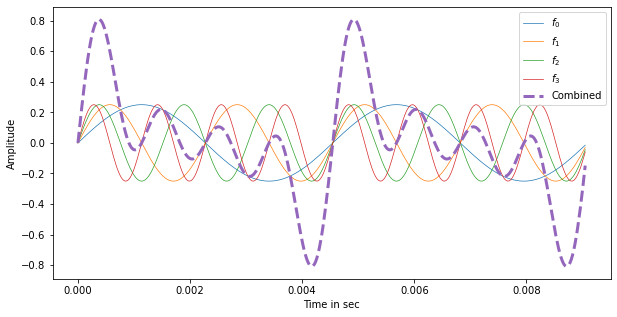

In [5]:
num_harmonics = 4
x2 = 0
plt.figure(figsize = (10,5))
plt.xlabel("Time in sec")
plt.ylabel("Amplitude")

for i in range(1 , num_harmonics + 1):
    x1 = (1 / num_harmonics) * np.sin(2 * np.pi * f0 * i * t)
    plt.plot(t[0:400] , x1[0:400] , linewidth = 0.7, label=f'$f_{i-1}$')
    x2 =  x2 + x1

plt.plot(t[0:400] , x2[0:400] , linewidth = 3, label=f'Combined', linestyle='dashed')
plt.legend()

In [6]:
ipd.Audio(data = x2, rate = Fs)

Creating different waveforms 

In [7]:
num_harmonics = 30
saw = square = tri = 0
phase = 1 # for triangle
for i in range(1 , num_harmonics + 1):
    saw =  saw + (1 / num_harmonics) * (1 / i) * np.sin(2 * np.pi * f0 * i * t)
    
    if (i % 2) != 0: # only odd harmonics for triangle and square wave
        tri = tri + phase * (1 / num_harmonics) * (1 / (i*i)) * np.sin(2 * np.pi * f0 * i * t)
        square = square + (1 / num_harmonics) * (1 / (i)) * np.sin(2 * np.pi * f0 * i * t)
        phase *= -1

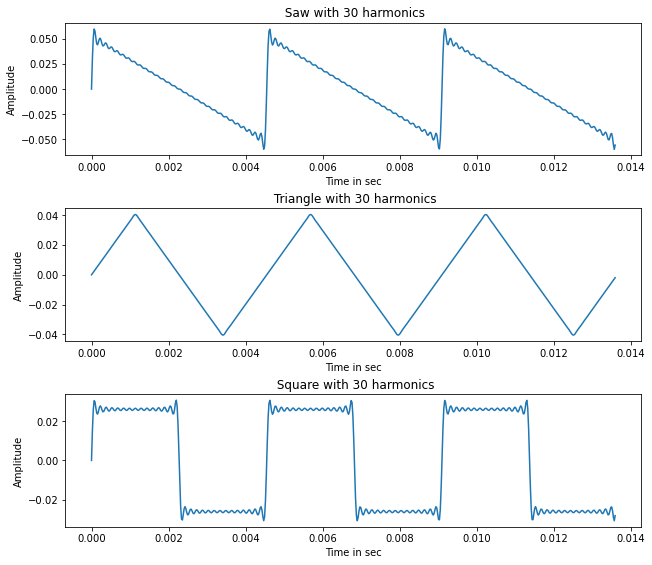

In [8]:
plt.figure(figsize=(10, 5))

plt.subplot(3,1,1)
plt.title(f' Saw with {num_harmonics} harmonics')
plt.xlabel("Time in sec")
plt.ylabel("Amplitude")
plt.plot(t[0:600] , saw[0:600])

plt.subplot(3,1,2)
plt.title(f' Triangle with {num_harmonics} harmonics')
plt.xlabel("Time in sec")
plt.ylabel("Amplitude")
plt.plot(t[0:600] , tri[0:600])

plt.subplot(3,1,3)
plt.title(f' Square with {num_harmonics} harmonics')
plt.xlabel("Time in sec")
plt.ylabel("Amplitude")
plt.plot(t[0:600] , square[0:600])

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1.5, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

In [9]:
print('Saw wave:')
ipd.Audio(data = saw, rate = Fs)

Saw wave:


In [10]:
print('Triangle wave: ')
ipd.Audio(data = tri, rate = Fs)

Triangle wave: 


In [11]:
print('Square wave: ')
ipd.Audio(data = square, rate = Fs)

Square wave: 


Creating envelope

In [12]:
attack_sec = 0.6
decay_sec = 0.4

att = np.linspace(0.0, 1.0, int(Fs * attack_sec))
dec = np.linspace(1.0, 0.0, int(Fs * decay_sec))

env = np.append(att, np.ones(round(Fs * (dur - attack_sec - decay_sec))), 0)
env = np.append(env, dec, 0)

In [13]:
saw = env * saw
tri = env * tri
square = env * square

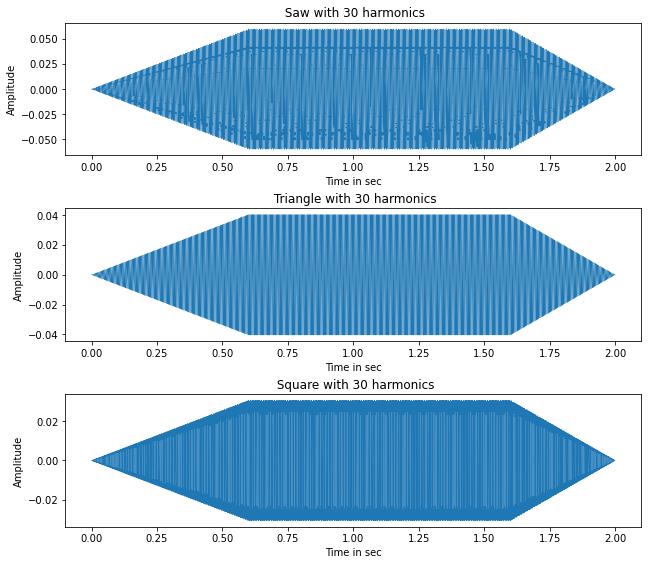

In [14]:
plt.figure(figsize=(10, 5))

plt.subplot(3,1,1)
plt.title(f' Saw with {num_harmonics} harmonics')
plt.xlabel("Time in sec")
plt.ylabel("Amplitude")
plt.plot(t , saw, linewidth=0.5)

plt.subplot(3,1,2)
plt.title(f' Triangle with {num_harmonics} harmonics')
plt.xlabel("Time in sec")
plt.ylabel("Amplitude")
plt.plot(t , tri, linewidth=0.5)

plt.subplot(3,1,3)
plt.title(f' Square with {num_harmonics} harmonics')
plt.xlabel("Time in sec")
plt.ylabel("Amplitude")
plt.plot(t , square, linewidth=0.5)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1.5, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

In [15]:
print('Saw wave:')
ipd.Audio(data = saw, rate = Fs)

Saw wave:


In [16]:
print('Triangle wave: ')
ipd.Audio(data = tri, rate = Fs)

Triangle wave: 


In [17]:
print('Square wave: ')
ipd.Audio(data = square, rate = Fs)

Square wave: 
